# Metadata

```
Course:   DS 5001
Module:   10 Lab
Topic:    Sentiment Analysis of Novels 
Autho:    R.C. Alvarado

Purpose:  Use the NRC lexicon to explore sentiment in .
```

# Set Up

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display, HTML

In [2]:
import plotly.express as px
import seaborn as sns; sns.set()
import os

In [3]:
os.chdir('/Users/mackenzyeleroy/Documents/MSDS/DS5001/FinalProject')
home_dir = os.getcwd()
home_dir

'/Users/mackenzyeleroy/Documents/MSDS/DS5001/FinalProject'

In [4]:
data_home = f"{home_dir}/Data"
parser_lib = f"{home_dir}/lib"
source_files = f'{data_home}/output'
data_prefix = 'wells-verne'

In [5]:
OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num', 'token_num']

In [6]:
salex_csv = f'{data_home}/salex/salex_nrc.csv'

In [7]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [8]:
sns.set()

# Get Data

## Get Lexicon

In [9]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [10]:
SALEX

anger  anticipation  disgust  fear  joy  negative  positive  \
term_str                                                                   
abandon          0             0        0     1    0         1         0   
abandoned        1             0        0     1    0         1         0   
abandonment      1             0        0     1    0         1         0   
abduction        0             0        0     1    0         1         0   
aberration       0             0        1     0    0         1         0   
...            ...           ...      ...   ...  ...       ...       ...   
young            0             1        0     0    1         0         1   
youth            1             1        0     1    1         0         1   
zeal             0             1        0     0    1         0         1   
zealous          0             0        0     0    1         0         1   
zest             0             1        0     0    1         0         1   

             sadness  surprise  trust  polarity  
term_str                                         
abandon            1         0      0        -1  
abandoned          1         0      0        -1  
abandonment        1         1      0        -1  
abduction          1         1      0        -1  
aberration         0         0      0        -1  
...              ...       ...    ...       ...  
young              0         1      0         1  
youth              0         1      0         1  
zeal               0         1      1         1  
zealous            0         0      1         1  
zest               0         0      1         1  

[3688 rows x 11 columns]

## Get Novels

In [11]:
TOKENS = pd.read_csv(f'{data_home}/output/{data_prefix}-CORPUS.csv').set_index(OHCO).sort_index()
LIB = pd.read_csv(f"{data_home}/output/{data_prefix}-LIB.csv").set_index('book_id').sort_index()
LIB['label'] = LIB.apply(lambda x: f"{x.author}: {x.title}", 1)

In [12]:
TOKENS

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                                
35      1       0        0        0          ('Introduction', 'NN')   NN   
                1        0        0                   ('The', 'DT')   DT   
                                  1                 ('Time', 'NNP')  NNP   
                                  2            ('Traveller', 'NNP')  NNP   
                                  3                 ('(for', 'NNP')  NNP   
...                                                             ...  ...   
44278   28      15       1        14                 ('will', 'MD')   MD   
                                  15                 ('come', 'VB')   VB   
                                  16                  ('out', 'RP')   RP   
                                  17                  ('all', 'DT')   DT   
                                  18              ('right."', 'NN')   NN   

                                                token_str      term_str  
book_id chap_id para_num sent_num token_num                              
35      1       0        0        0          Introduction  introduction  
                1        0        0                   The           the  
                                  1                  Time          time  
                                  2             Traveller     traveller  
                                  3                  (for           for  
...                                                   ...           ...  
44278   28      15       1        14                 will          will  
                                  15                 come          come  
                                  16                  out           out  
                                  17                  all           all  
                                  18              right."         right  

[1776643 rows x 4 columns]

In [13]:
LIB

source_file_path  \
book_id                                                      
35                         WELLS__35__The_Time_Machine.txt   
36                    WELLS__36__The_War_of_the_Worlds.txt   
103        VERNE__103__Around_the_World_in_Eighty_Days.txt   
159            WELLS__159__The_Island_of_Doctor_Moreau.txt   
164      VERNE__164__Twenty_Thousand_Leagues_under_the_...   
718                            WELLS__718__Tono-Bungay.txt   
780                     WELLS__780__The_War_in_the_Air.txt   
1013            WELLS__1013__The_First_Men_in_the_Moon.txt   
1059                   WELLS__1059__The_World_Set_Free.txt   
1268                VERNE__1268__The_Mysterious_Island.txt   
1353                      VERNE__1353__Off_on_a_Comet!.txt   
1355                 VERNE__1355__The_Underground_City.txt   
3091     VERNE__3091__Eight_Hundred_Leagues_on_the_Amaz...   
3526              VERNE__3526__Five_Weeks_in_a_Balloon.txt   
5230     WELLS__5230__The_Invisible_Man_A_Grotesque_Rom...   
6424                      WELLS__6424__A_Modern_Utopia.txt   
12163                 WELLS__12163__The_Sleeper_Awakes.txt   
16457                VERNE__16457__All_Around_the_Moon.txt   
18857    VERNE__18857__A_Journey_to_the_Centre_of_the_E...   
44278         VERNE__44278__From_the_Earth_to_the_Moon.txt   

                                         title        author  \
book_id                                                        
35                            The Time Machine    WELLS, H.G   
36                       The War of the Worlds    WELLS, H.G   
103            Around the World in Eighty Days  VERNE, JULES   
159                The Island of Doctor Moreau    WELLS, H.G   
164      Twenty Thousand Leagues under the Sea  VERNE, JULES   
718                                Tono-Bungay    WELLS, H.G   
780                         The War in the Air    WELLS, H.G   
1013                 The First Men in the Moon    WELLS, H.G   
1059                        The World Set Free    WELLS, H.G   
1268                     The Mysterious Island  VERNE, JULES   
1353                           Off on a Comet!  VERNE, JULES   
1355                      The Underground City  VERNE, JULES   
3091       Eight Hundred Leagues on the Amazon  VERNE, JULES   
3526                   Five Weeks in a Balloon  VERNE, JULES   
5230     The Invisible Man A Grotesque Romance    WELLS, H.G   
6424                           A Modern Utopia    WELLS, H.G   
12163                       The Sleeper Awakes    WELLS, H.G   
16457                      All Around the Moon  VERNE, JULES   
18857     A Journey to the Centre of the Earth  VERNE, JULES   
44278               From the Earth to the Moon  VERNE, JULES   

                                        chap_regex  book_len  n_chaps  \
book_id                                                                 
35                      ^\s*CHAPTER\s+[[IVXLCM]+\.     32506       17   
36                       ^\s*CHAPTER\s+[IVXLCM]+\.     60129       27   
103                      ^\s*CHAPTER\s+[IVXLCM]+\.     63114       37   
159      (INTRODUCTION.)|^\s*CHAPTER\s+[IVXLCM]+\.     43782       23   
164                                ^CHAPTER\s+\d+$    103694       46   
718                  ^\s*CHAPTER\sTHE\s[A-Z';, -]+    134677       14   
780                      ^\s*CHAPTER\s+[IVXLCM]+\.     98207       11   
1013                     ^\s*CHAPTER\s+[IVXLCM]+\.     68534       26   
1059                 ^\s*CHAPTER\sTHE\s[A-Z';, -]+    115742        5   
1268                               ^Chapter\s+\d+$    194229       62   
1353                     ^\s*CHAPTER\s+[IVXLCM]+\.    100671       43   
1355                     ^\s*CHAPTER\s+[IVXLCM]+\.     43662       19   
3091                     ^\s*CHAPTER\s+[IVXLCM]+\.     95162       40   
3526                   ^\s*CHAPTER\s+[A-Z';, -]+\.     90793       44   
5230                     ^\s*CHAPTER\s+[IVXLCM]+\.     48562       28   
6424                 ^\s*CH

**Get `BOW` by chapter, `VOCAB`, `tfidf`, `dfidf`**

In [14]:
BOW = TOKENS.value_counts(OHCO[:2] + ['term_str']).to_frame('n').sort_index()
VOCAB = TOKENS.value_counts('term_str').to_frame('n').sort_index()
N = len(BOW.groupby(OHCO[:2]))
VOCAB['df'] = BOW.groupby('term_str').count()
VOCAB['dfidf'] = VOCAB.df * np.log2(N/VOCAB.df)
BOW['tf'] = (BOW.unstack().T / BOW.unstack().T.sum()).T.stack()
BOW['tfidf'] = BOW.tf * np.log2(N/VOCAB.df)

## Create `COMBO`

In [15]:
COMBO = TOKENS.join(LIB).join(SALEX, on='term_str').join(BOW, on=OHCO[:2] + ['term_str'])
COMBO = COMBO.drop(['n', 'tf'], axis=1)
COMBO = COMBO.sort_index()

In [16]:
COMBO

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                                
35      1       0        0        0          ('Introduction', 'NN')   NN   
                1        0        0                   ('The', 'DT')   DT   
                                  1                 ('Time', 'NNP')  NNP   
                                  2            ('Traveller', 'NNP')  NNP   
                                  3                 ('(for', 'NNP')  NNP   
...                                                             ...  ...   
44278   28      15       1        14                 ('will', 'MD')   MD   
                                  15                 ('come', 'VB')   VB   
                                  16                  ('out', 'RP')   RP   
                                  17                  ('all', 'DT')   DT   
                                  18              ('right."', 'NN')   NN   

                                                token_str      term_str  \
book_id chap_id para_num sent_num token_num                               
35      1       0        0        0          Introduction  introduction   
                1        0        0                   The           the   
                                  1                  Time          time   
                                  2             Traveller     traveller   
                                  3                  (for           for   
...                                                   ...           ...   
44278   28      15       1        14                 will          will   
                                  15                 come          come   
                                  16                  out           out   
                                  17                  all           all   
                                  18              right."         right   

                                                                         source_file_path  \
book_id chap_id para_num sent_num token_num                                                 
35      1       0        0        0                       WELLS__35__The_Time_Machine.txt   
                1        0        0                       WELLS__35__The_Time_Machine.txt   
                                  1                       WELLS__35__The_Time_Machine.txt   
                                  2                       WELLS__35__The_Time_Machine.txt   
                                  3                       WELLS__35__The_Time_Machine.txt   
...                                                                                   ...   
44278   28      15       1        14         VERNE__44278__From_the_Earth_to_the_Moon.txt   
                                  15         VERNE__44278__From_the_Earth_to_the_Moon.txt   
                                  16         VERNE__44278__From_the_Earth_to_the_Moon.txt   
                                  17         VERNE__44278__From_the_Earth_to_the_Moon.txt   
                                  18         VERNE__44278__From_the_Earth_to_the_Moon.txt   

                                                                  title  \
book_id chap_id para_num sent_num token_num                               
35      1       0        0        0                    The Time Machine   
                1        0        0                    The Time Machine   
                                  1                    The Time Machine   
                                  2                    The Time Machine   
                                  3                    The Time Machine   
...                                                                 ...   
44278   28      15       1        14         From the Earth to the Moon   
                                  15         From the Earth to the Moon   
                                  16         From the Earth to the Moon   
                                  17         From the Eart

In [17]:
COMBO.dropna()

pos_tuple  pos  \
book_id chap_id para_num sent_num token_num                                   
35      1       1        1        15               ('animated.', 'VB')   VB   
                         2        2                    ('burnt', 'NN')   NN   
                                  7                 ('radiance', 'NN')   NN   
                         3        20               ('luxurious', 'JJ')   JJ   
                2        2        13         ('misconception.”', 'NN')   NN   
...                                                                ...  ...   
44278   28      14       3        4                 ('patience', 'NN')   NN   
                                  17                  ('worthy', 'JJ')   JJ   
                                  31                 ('despair', 'NN')   NN   
                15       0        11              ('resources', 'NNS')  NNS   
                                  13                    ('art,', 'JJ')   JJ   

                                                   token_str       term_str  \
book_id chap_id para_num sent_num token_num                                   
35      1       1        1        15               animated.       animated   
                         2        2                    burnt          burnt   
                                  7                 radiance       radiance   
                         3        20               luxurious      luxurious   
                2        2        13         misconception.”  misconception   
...                                                      ...            ...   
44278   28      14       3        4                 patience       patience   
                                  17                  worthy         worthy   
                                  31                 despair        despair   
                15       0        11               resources      resources   
                                  13                    art,            art   

                                                                         source_file_path  \
book_id chap_id para_num sent_num token_num                                                 
35      1       1        1        15                      WELLS__35__The_Time_Machine.txt   
                         2        2                       WELLS__35__The_Time_Machine.txt   
                                  7                       WELLS__35__The_Time_Machine.txt   
                         3        20                      WELLS__35__The_Time_Machine.txt   
                2        2        13                      WELLS__35__The_Time_Machine.txt   
...                                                                                   ...   
44278   28      14       3        4          VERNE__44278__From_the_Earth_to_the_Moon.txt   
                                  17         VERNE__44278__From_the_Earth_to_the_Moon.txt   
                                  31         VERNE__44278__From_the_Earth_to_the_Moon.txt   
                15       0        11         VERNE__44278__From_the_Earth_to_the_Moon.txt   
                                  13         VERNE__44278__From_the_Earth_to_the_Moon.txt   

                                                                  title  \
book_id chap_id para_num sent_num token_num                               
35      1       1        1        15                   The Time Machine   
                         2        2                    The Time Machine   
                                  7                    The Time Machine   
                         3        20                   The Time Machine   
                2        2        13                   The Time Machine   
...                                                                 ...   
44278   28      14       3        4          From the Earth to the Moon   
                                  17         From the Earth to the Moon   
                                  31         

# Sentiment by Book

In [18]:
BOOKS = COMBO.groupby(OHCO[:1])[emo_cols+['tfidf']].mean().join(LIB.label)

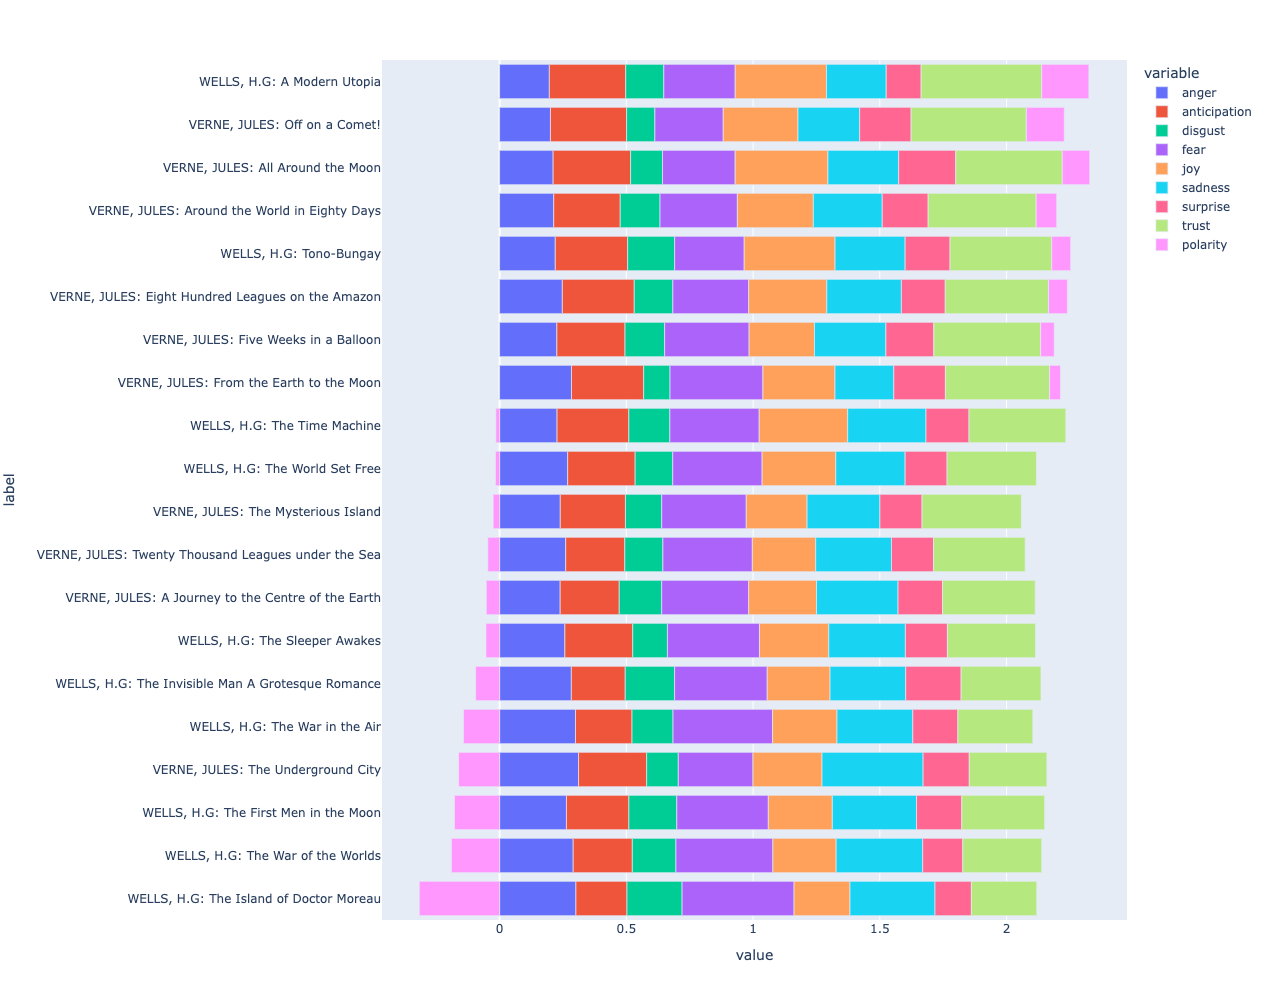

In [19]:
px.bar(BOOKS.reset_index().sort_values('polarity'), emo_cols, 'label', orientation='h', height=1000)

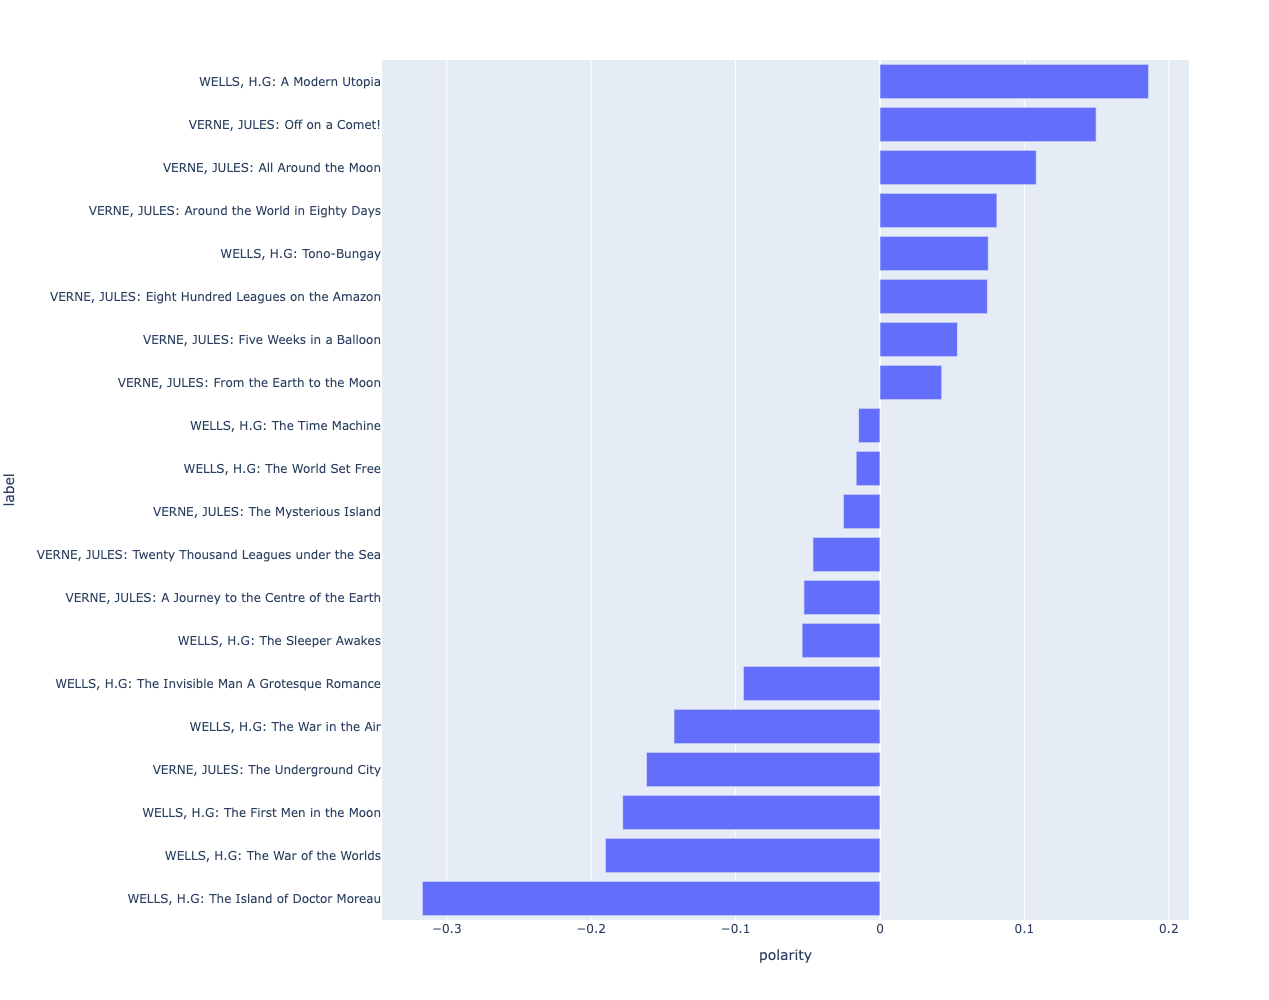

In [20]:
px.bar(BOOKS.reset_index().sort_values('polarity'), 'polarity', 'label', orientation='h', height=1000)

In [21]:
# BOOKS.sort_values('polarity').plot.barh(figsize=(10,25));

# Compare Dracula and Northanger Abbey

In [22]:
BOOKS

anger  anticipation   disgust      fear       joy   sadness  \
book_id                                                                   
35       0.226674      0.283205  0.161910  0.352360  0.349067  0.309001   
36       0.290342      0.233284  0.172065  0.382467  0.249629  0.341456   
103      0.213534      0.262440  0.156952  0.305090  0.299687  0.271823   
159      0.301107      0.201476  0.217343  0.441697  0.220664  0.335424   
164      0.260786      0.233243  0.150231  0.352851  0.250000  0.298921   
718      0.219695      0.285533  0.185363  0.274371  0.358435  0.276491   
780      0.299406      0.223023  0.161773  0.392722  0.254188  0.299045   
1013     0.263729      0.246301  0.189083  0.361065  0.252549  0.332128   
1059     0.268551      0.266196  0.148410  0.352473  0.290636  0.273557   
1268     0.239381      0.257140  0.143213  0.333368  0.240004  0.287257   
1353     0.200634      0.300511  0.111503  0.269685  0.294874  0.243262   
1355     0.311512      0.268623  0.124906  0.294582  0.272385  0.398796   
3091     0.247538      0.283773  0.152225  0.299330  0.307995  0.294210   
3526     0.225928      0.268890  0.156209  0.333333  0.257773  0.281892   
5230     0.283056      0.212589  0.194774  0.365400  0.247823  0.298496   
6424     0.196238      0.301320  0.150298  0.281606  0.360101  0.235666   
12163    0.257543      0.267760  0.136850  0.363032  0.273462  0.302210   
16457    0.211186      0.305732  0.125995  0.286425  0.366043  0.279061   
18857    0.238957      0.233043  0.167478  0.343130  0.267652  0.321739   
44278    0.283600      0.284800  0.104000  0.366400  0.284400  0.232000   

         surprise     trust  polarity     tfidf  \
book_id                                           
35       0.169594  0.381998 -0.014819  0.001724   
36       0.158098  0.311441 -0.190193  0.001571   
103      0.181120  0.426216  0.081035  0.002935   
159      0.143542  0.257934 -0.316974  0.001839   
164      0.166025  0.361325 -0.046418  0.001732   
718      0.177027  0.401102  0.075021  0.000943   
780      0.177806  0.295622 -0.142677  0.001028   
1013     0.178560  0.326866 -0.178231  0.001374   
1059     0.165489  0.352768 -0.016490  0.000818   
1268     0.166061  0.391941 -0.025340  0.001557   
1353     0.202924  0.454642  0.149727  0.001599   
1355     0.182092  0.306245 -0.161776  0.002694   
3091     0.173100  0.407444  0.074439  0.002425   
3526     0.188996  0.421519  0.053703  0.001758   
5230     0.218527  0.315123 -0.094616  0.003136   
6424     0.137638  0.475855  0.186110  0.000858   
12163    0.165835  0.347826 -0.053932  0.001689   
16457    0.225119  0.420382  0.108280  0.001387   
18857    0.175478  0.365565 -0.052696  0.001509   
44278    0.203600  0.411200  0.042800  0.002622   

                                                     label  
book_id                                                     
35                            WELLS, H.G: The Time Machine  
36                       WELLS, H.G: The War of the Worlds  
103          VERNE, JULES: Around the World in Eighty Days  
159                WELLS, H.G: The Island of Doctor Moreau  
164      VERNE, JULES: Twenty Thousand Leagues under th...  
718                                WELLS, H.G: Tono-Bungay  
780                         WELLS, H.G: The War in the Air  
1013                 WELLS, H.G: The First Men in the Moon  
1059                        WELLS, H.G: The World Set Free  
1268                   VERNE, JULES: The Mysterious Island  
1353                         VERNE, JULES: Off on a Comet!  
1355                    VERNE, JULES: The Underground City  
3091     VERNE, JULES: Eight Hundred Leagues on the Amazon  
3526                 VERNE, JULES: Five Weeks in a Balloon  
5230     WELLS, H.G: The Invisible Man A Grotesque Romance  
6424                           WELLS, H.G: A Modern Utopia  
12163                       WELLS, H.G: The Sleeper Awakes  
16457                    VERNE, JULES: All Around the Moon  
18857    VERNE, JU

<AxesSubplot:>

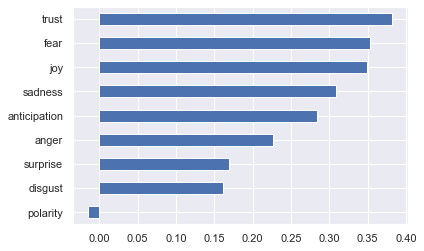

In [23]:
BOOKS.loc[35, emo_cols].sort_values().plot.barh()

<AxesSubplot:>

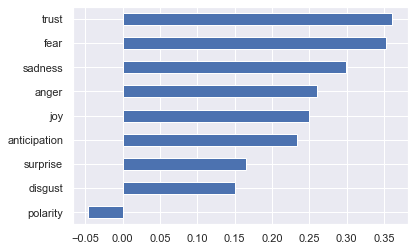

In [24]:
BOOKS.loc[164, emo_cols].sort_values().plot.barh()

<AxesSubplot:>

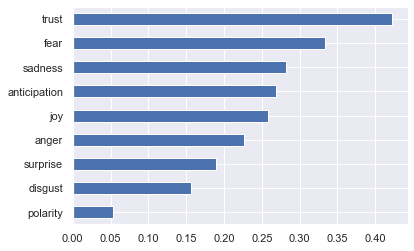

In [25]:
BOOKS.loc[3526, emo_cols].sort_values().plot.barh()

# Mean Sentiment by Chapter

In [26]:
CHAPS = COMBO.groupby(OHCO[:2])[emo_cols+['tfidf']].mean()

In [27]:
CHAPS.loc[35].style.background_gradient(cmap='GnBu', high=.5, axis=None)

In [28]:
CHAPS.loc[164].style.background_gradient(cmap='GnBu', high=.5, axis=None)

In [29]:
CHAPS.loc[3526].style.background_gradient(cmap='GnBu', high=.5, axis=None)

In [30]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)

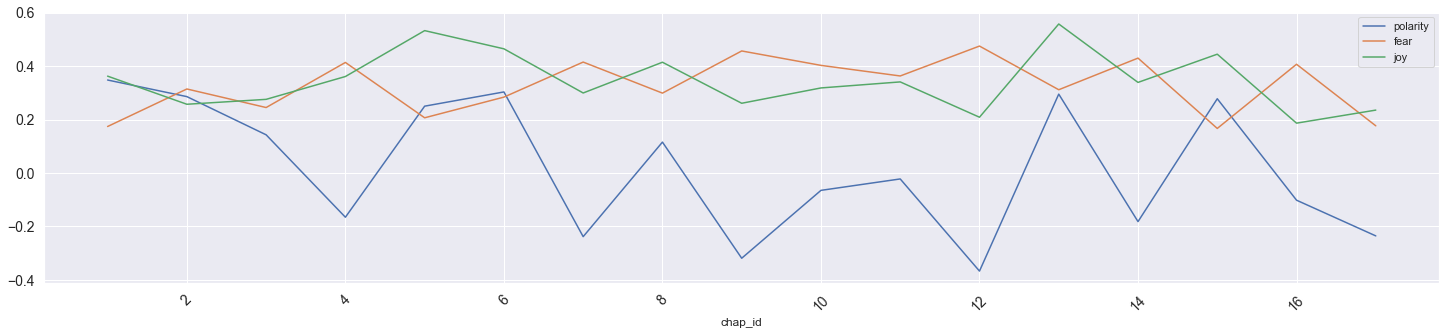

In [31]:
CHAPS.loc[35][['polarity', 'fear','joy']].plot(**FIG);

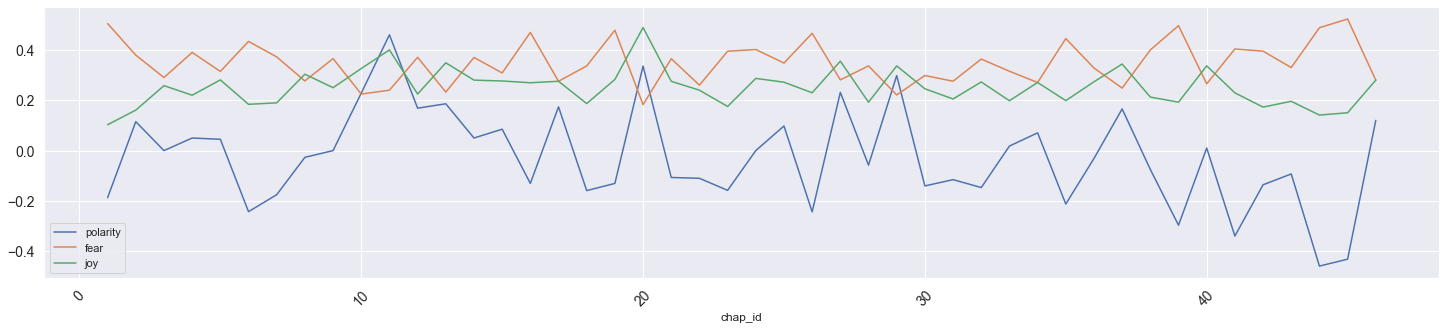

In [32]:
CHAPS.loc[164][['polarity', 'fear','joy']].plot(**FIG);

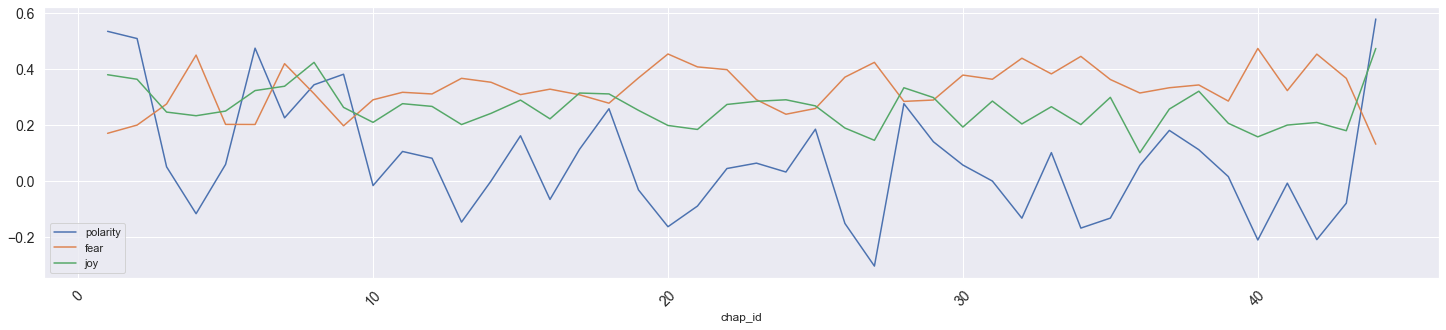

In [33]:
CHAPS.loc[3526][['polarity', 'fear','joy']].plot(**FIG);

# Close Read Sentiment in Texts

In [34]:
COMBO['html'] = COMBO.fillna(0).apply(lambda x: f"<spdan class='sent{int(np.sign(x['polarity']))}'>{x.term_str}</span>", 1)

In [35]:
COMBO.html.head()

book_id  chap_id  para_num  sent_num  token_num
35       1        0         0         0            <spdan class='sent0'>introduction</span>
                  1         0         0                     <spdan class='sent0'>the</span>
                                      1                    <spdan class='sent0'>time</span>
                                      2               <spdan class='sent0'>traveller</span>
                                      3                     <spdan class='sent0'>for</span>
Name: html, dtype: object

In [36]:
SENTENCES = COMBO.groupby(OHCO[:-1])[emo_cols].mean() #.term_str.count().to_frame('n').join(LIB).join(SALEX)

In [37]:
SENTENCES

anger  anticipation   disgust      fear  \
book_id chap_id para_num sent_num                                               
35      1       0        0              NaN           NaN       NaN       NaN   
                1        0              NaN           NaN       NaN       NaN   
                         1         0.000000      0.000000  0.000000  0.000000   
                         2         0.000000      0.500000  0.500000  0.000000   
                         3         0.000000      0.000000  0.000000  0.000000   
...                                     ...           ...       ...       ...   
44278   28      14       1         0.000000      1.000000  0.000000  0.000000   
                         2         0.000000      1.000000  0.000000  0.000000   
                         3         0.333333      0.333333  0.333333  0.333333   
                15       0         0.000000      0.500000  0.000000  0.000000   
                         1              NaN           NaN       NaN       NaN   

                                   joy   sadness  surprise     trust  polarity  
book_id chap_id para_num sent_num                                               
35      1       0        0         NaN       NaN       NaN       NaN       NaN  
                1        0         NaN       NaN       NaN       NaN       NaN  
                         1         1.0  0.000000       0.0  0.000000  1.000000  
                         2         0.5  0.000000       0.0  0.500000  0.000000  
                         3         1.0  0.000000       0.0  0.000000  1.000000  
...                                ...       ...       ...       ...       ...  
44278   28      14       1         0.0  0.000000       0.0  0.000000  1.000000  
                         2         0.0  0.000000       0.0  0.000000  0.500000  
                         3         0.0  0.333333       0.0  0.666667  0.333333  
                15       0         1.0  0.500000       0.5  0.500000  1.000000  
                         1         NaN       NaN       NaN       NaN       NaN  

[96012 rows x 9 columns]

In [38]:
SENTENCES['html_str'] = COMBO.groupby(OHCO[:-1]).html.apply(lambda x: x.str.cat(sep=' '))

In [39]:
def sample_sentences(df, sample_size=10, emo='polarity'):

    rows = []
    sample = df.dropna().sample(sample_size).index    
    for idx in sample:
        valence = round(df.loc[idx, emo], 4)
        id_label = ' '.join([str(i) for i in idx]).upper()
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z = 0
        rows.append("""
        <tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
            <td style="width:20%;">{1}</td>
            <td style="width:70%;">{2}</td>
            <td>{3}</td>
        </tr>
        """.format(color, id_label, df.loc[idx, 'html_str'], valence))   

    css = """
    #sample1 td {font-size:110%;vertical-align:top;text-align:left;} 
    #sample1 th {font-size:120%;vertical-align:top;text-align:left;} 
    .sent-1 {color:red;font-weight:bold;} 
    .sent1 {color:green;font-weight:bold;}
    """
    display(HTML(f'<style>{css}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentence</th><th>ID</th><th>Sentiment</th></tr>'+''.join(rows)+'</table>'))

In [40]:
sample_sentences(SENTENCES.loc[35])

In [41]:
sample_sentences(SENTENCES.loc[164])

In [42]:
sample_sentences(SENTENCES.loc[3526])

# Explore VADER

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
analyser = SentimentIntensityAnalyzer()

In [45]:
SENTENCES['sent_str'] = COMBO.groupby(OHCO[:-1]).term_str.apply(lambda x: x.str.cat(sep=' '))
vader_cols = [f"vader_{col}" for col in "neg neu pos compound".split()]
SENTENCES[vader_cols] = SENTENCES.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))

In [46]:
SENTENCES.head()

anger  anticipation  disgust  fear  joy  \
book_id chap_id para_num sent_num                                            
35      1       0        0           NaN           NaN      NaN   NaN  NaN   
                1        0           NaN           NaN      NaN   NaN  NaN   
                         1           0.0           0.0      0.0   0.0  1.0   
                         2           0.0           0.5      0.5   0.0  0.5   
                         3           0.0           0.0      0.0   0.0  1.0   

                                   sadness  surprise  trust  polarity  \
book_id chap_id para_num sent_num                                       
35      1       0        0             NaN       NaN    NaN       NaN   
                1        0             NaN       NaN    NaN       NaN   
                         1             0.0       0.0    0.0       1.0   
                         2             0.0       0.0    0.5       0.0   
                         3             0.0       0.0    0.0       1.0   

                                                                            html_str  \
book_id chap_id para_num sent_num                                                      
35      1       0        0                  <spdan class='sent0'>introduction</span>   
                1        0         <spdan class='sent0'>the</span> <spdan class='...   
                         1         <spdan class='sent0'>his</span> <spdan class='...   
                         2         <spdan class='sent0'>the</span> <spdan class='...   
                         3         <spdan class='sent0'>our</span> <spdan class='...   

                                                                            sent_str  \
book_id chap_id para_num sent_num                                                      
35      1       0        0                                              introduction   
                1        0         the time traveller for so it will be convenien...   
                         1         his pale grey eyes shone and twinkled and his ...   
                         2         the fire burnt brightly and the soft radiance ...   
                         3         our chairs being his patents embraced and care...   

                                   vader_neg  vader_neu  vader_pos  \
book_id chap_id para_num sent_num                                    
35      1       0        0             0.000      1.000      0.000   
                1        0             0.000      0.945      0.055   
                         1             0.000      0.926      0.074   
                         2             0.077      0.767      0.157   
                         3             0.000      0.827      0.173   

                                   vader_compound  
book_id chap_id para_num sent_num                  
35      1       0        0                 0.0000  
                1        0                 0.0258  
                         1                 0.0516  
                         2                 0.3612  
                         3                 0.7717

In [47]:
def vader_plot(novel_name):
    global SENTENCES
    X = SENTENCES.loc[novel_name]
    w = int(len(X)/5)
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(25,20))
    X[['vader_pos','vader_neg']].rolling(w).mean().plot(ax=axes[0], title=f'{novel_name}\npos, neg {w}');
    X['vader_neu'].rolling(w).mean().plot(ax=axes[1], title=f'{novel_name}\nneu');
    X['vader_compound'].rolling(w).mean().plot(ax=axes[2], title=f'{novel_name}\ncompound');

## The Time Machine

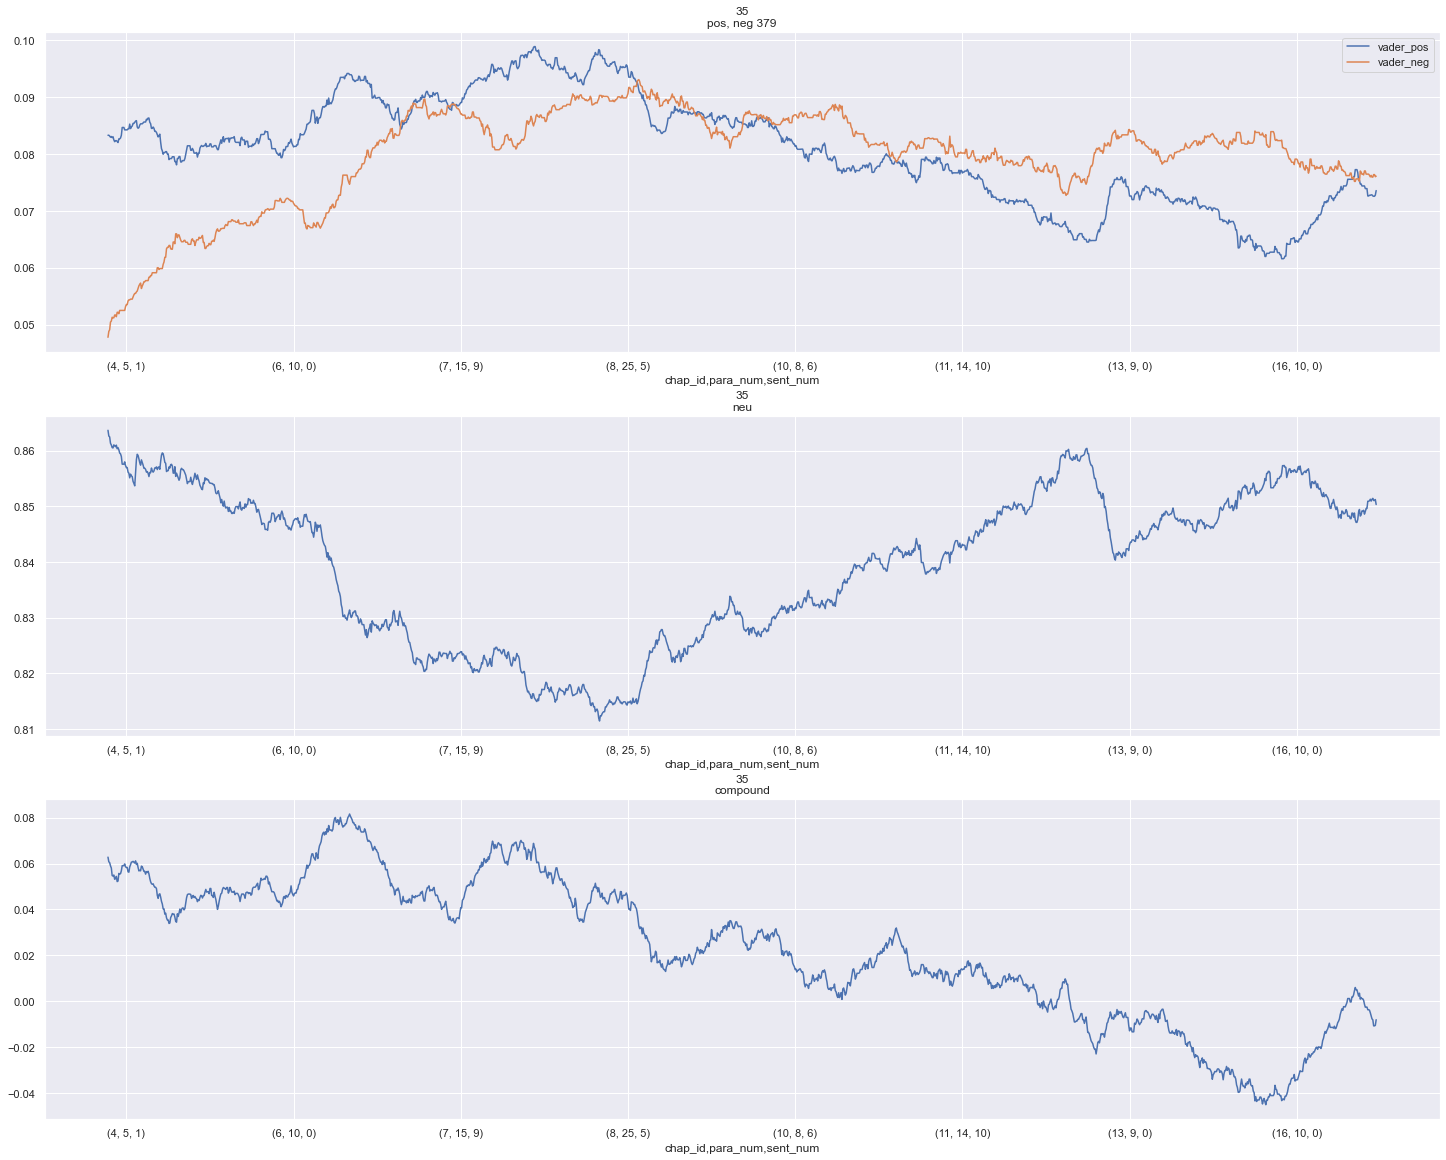

In [48]:
vader_plot(35)

## 20,000 Leagues Under the Sea

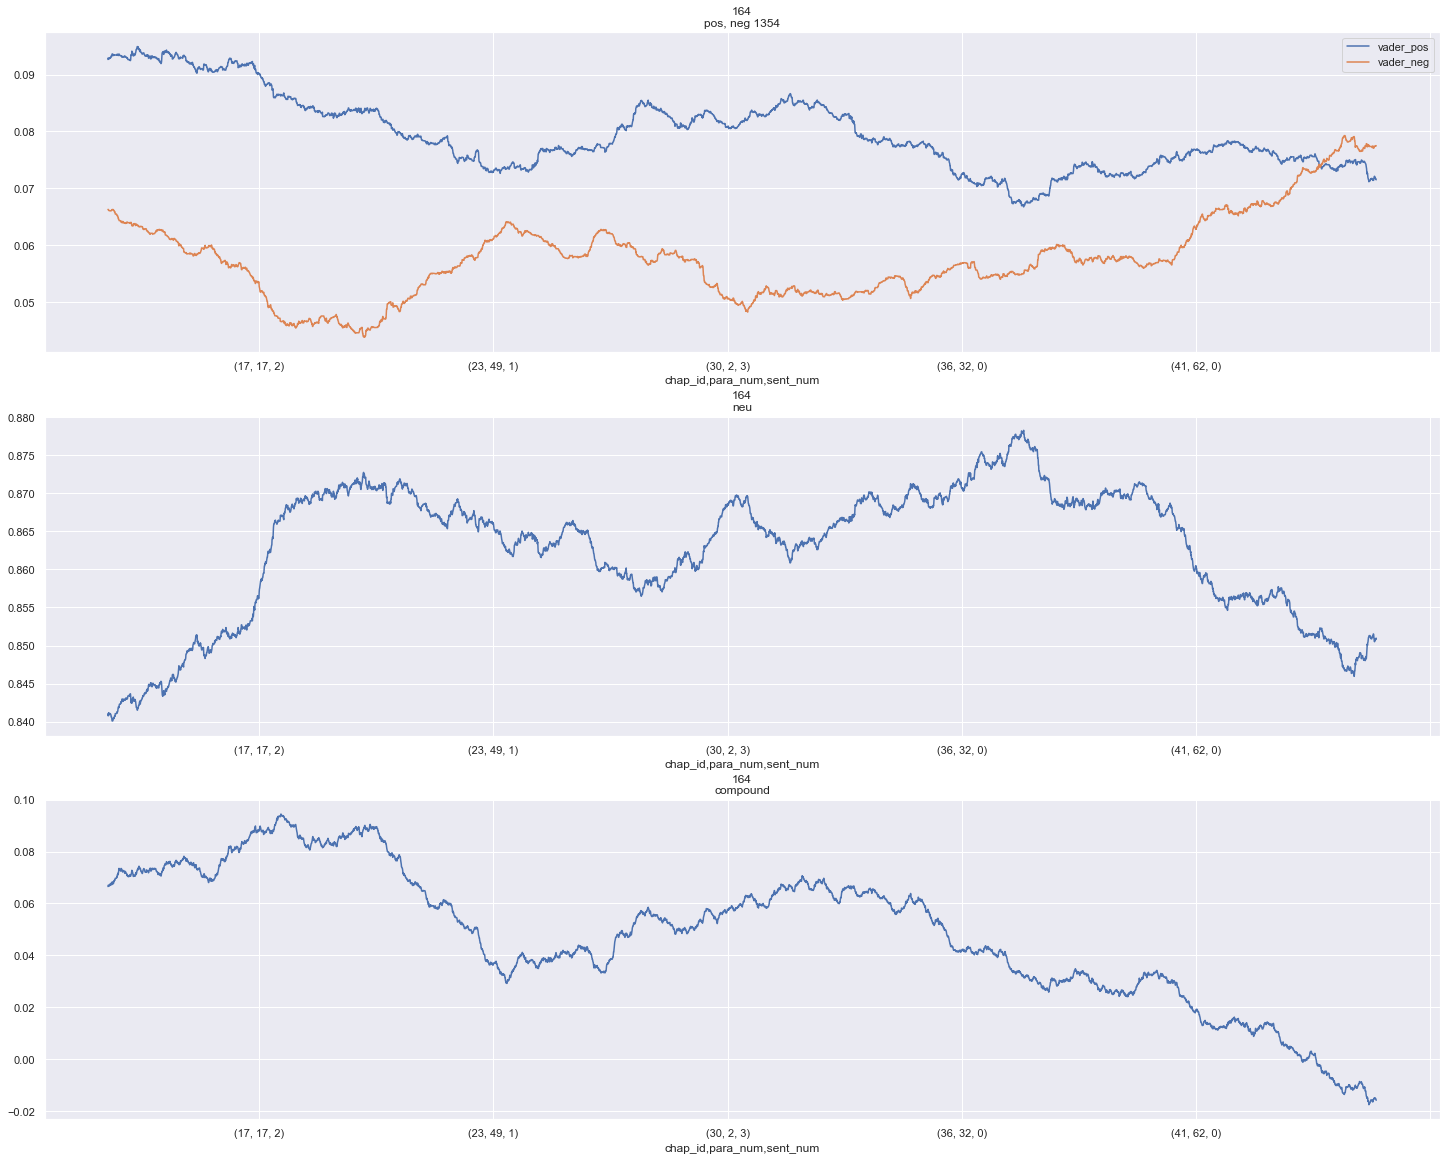

In [49]:
vader_plot(164)

## Compare Two Novels

In [50]:
def compare_novels(novel_a, novel_b, w=10, emo='vader_compound'):
    global SENTENCES, FIG
    
    A = SENTENCES.loc[novel_a].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    A['cut'] = pd.cut(A.seq, 100)
    A1 = A.groupby('cut')[emo].mean().reset_index(drop=True)

    B = SENTENCES.loc[novel_b].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    B['cut'] = pd.cut(B.seq, 100)
    B1 = B.groupby('cut')[emo].mean().reset_index(drop=True)

    C = pd.concat([A1,B1], axis=1)
    C.columns = [novel_a, novel_b]

    plt = C.rolling(w).mean().plot(**FIG)

In [51]:
LIB.index.tolist()

[35,
 36,
 103,
 159,
 164,
 718,
 780,
 1013,
 1059,
 1268,
 1353,
 1355,
 3091,
 3526,
 5230,
 6424,
 12163,
 16457,
 18857,
 44278]

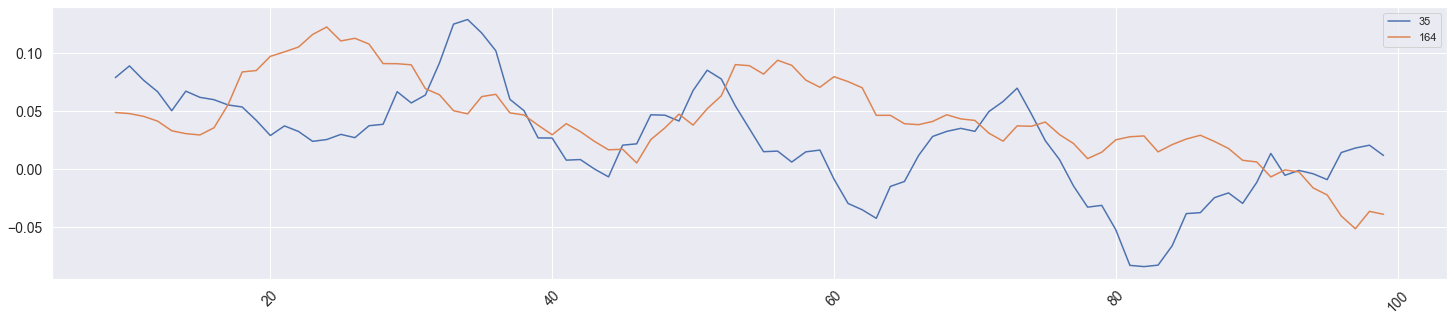

In [52]:
compare_novels(35,164)

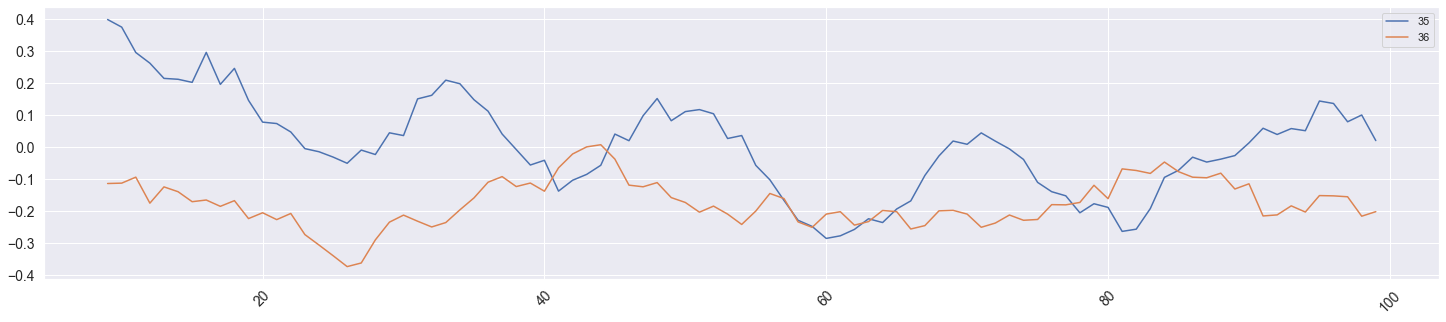

In [53]:
compare_novels(35,36, emo='polarity')

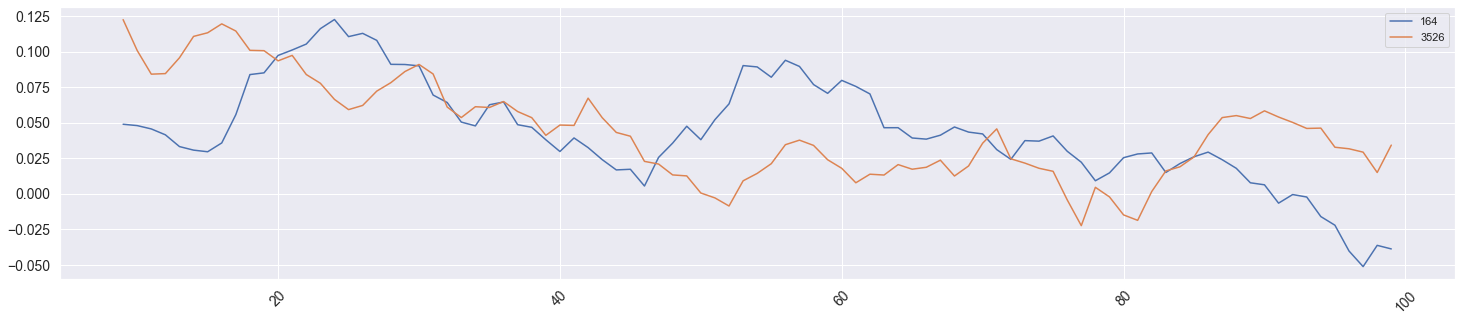

In [54]:
compare_novels(164,3526)

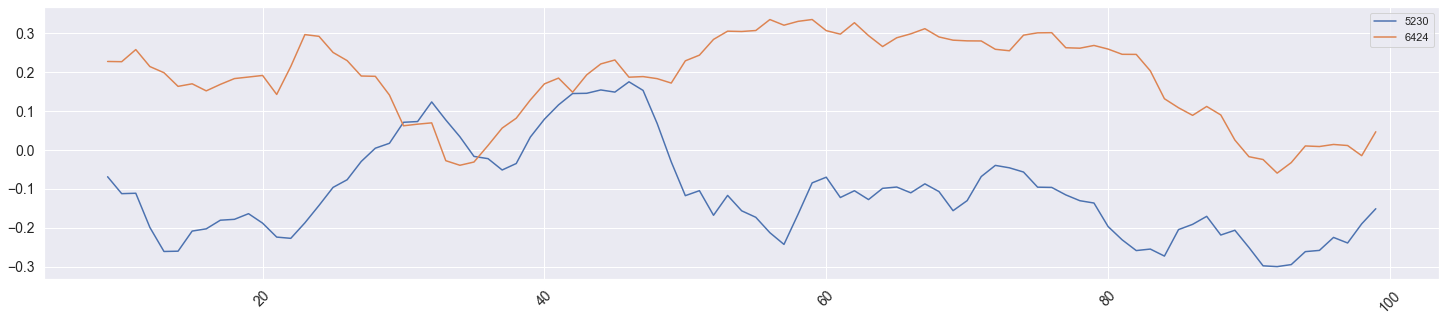

In [55]:
compare_novels(5230, 6424, emo='polarity')